<a href="https://colab.research.google.com/github/AminaZahid/Patient-Treatment-Classification/blob/main/Patient_Treatment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# for Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

import pickle

# To ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')

# for styling
plt.style.use('seaborn-whitegrid')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/EPC.csv')
data.head(3)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0


In [3]:
data['SOURCE'] = data.SOURCE.replace({"in":1, 'out':0})


# get all the features
features = [feat for feat in data.columns if feat !='SOURCE']

X = data[features] # feature set
y = data['SOURCE'] # target

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# train and test datasets dimensions
X_train.shape, X_test.shape

((2647, 10), (662, 10))

In [4]:
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

num_features = [feat for feat in features if data[feat].dtype != object]
cat_features = [feat for feat in features if data[feat].dtype == object]

print(f"Total number of features : {len(features)}")
print(f"Number of numerical features : {len(num_features)}")
print(f"Number of categorical features : {len(cat_features)}\n")

The dataset contains 3309 rows and 11 columns
Total number of features : 10
Number of numerical features : 9
Number of categorical features : 1



In [5]:
data.isna().mean().to_frame(name='Missing %')

,Missing %
HAEMATOCRIT,0.0
HAEMOGLOBINS,0.0
ERYTHROCYTE,0.0
LEUCOCYTE,0.0
THROMBOCYTE,0.0
MCH,0.0
MCHC,0.0
MCV,0.0
AGE,0.0
SEX,0.0


In [6]:
data.nunique().to_frame(name='# of unique values')

,# of unique values
HAEMATOCRIT,314
HAEMOGLOBINS,128
ERYTHROCYTE,406
LEUCOCYTE,255
THROMBOCYTE,525
MCH,177
MCHC,101
MCV,390
AGE,95
SEX,2


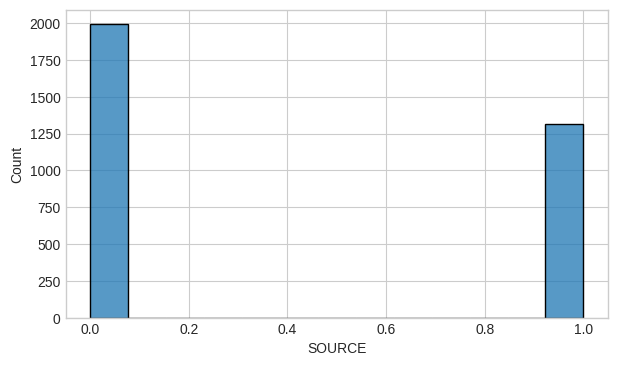

In [7]:
plt.figure(figsize=(7,4))
fig = sns.histplot(x='SOURCE', data=data)

In [8]:
data.SOURCE.value_counts().to_frame(name='Count')

,Count
0,1992
1,1317


In [9]:
data[num_features].describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000
mean,38.226111,12.749350,4.544802,8.715533,258.893019,28.230039,33.336476,84.611333,46.644303
std,5.971943,2.084325,0.784510,4.991299,112.676139,2.696520,1.247055,6.916079,21.874106
min,13.700000,3.800000,1.480000,1.100000,10.000000,14.900000,26.000000,54.000000,1.000000
25%,34.300000,11.400000,4.040000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000
50%,38.700000,12.900000,4.580000,7.600000,257.000000,28.700000,33.400000,85.300000,48.000000
75%,42.500000,14.200000,5.060000,10.300000,322.000000,29.800000,34.100000,88.800000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1121.000000,40.800000,38.400000,115.600000,99.000000


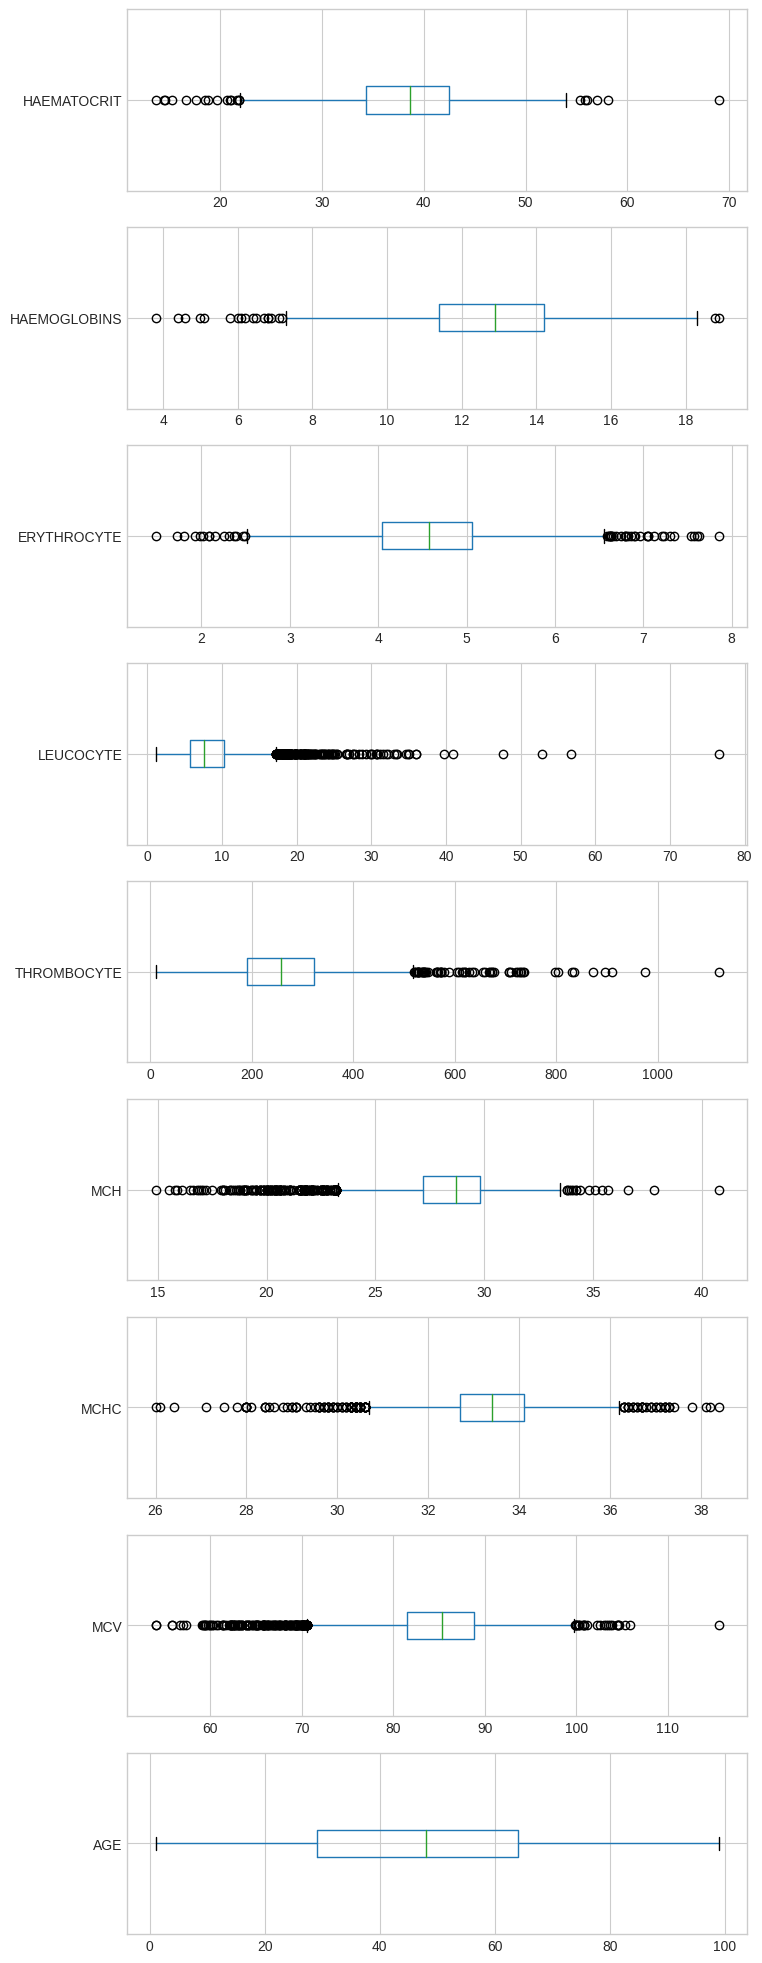

In [10]:
fig, axes = plt.subplots(9, 1, figsize=(8, 25))
for i, c in enumerate(num_features):
    f = data[[c]].boxplot(ax=axes[i], vert=False)

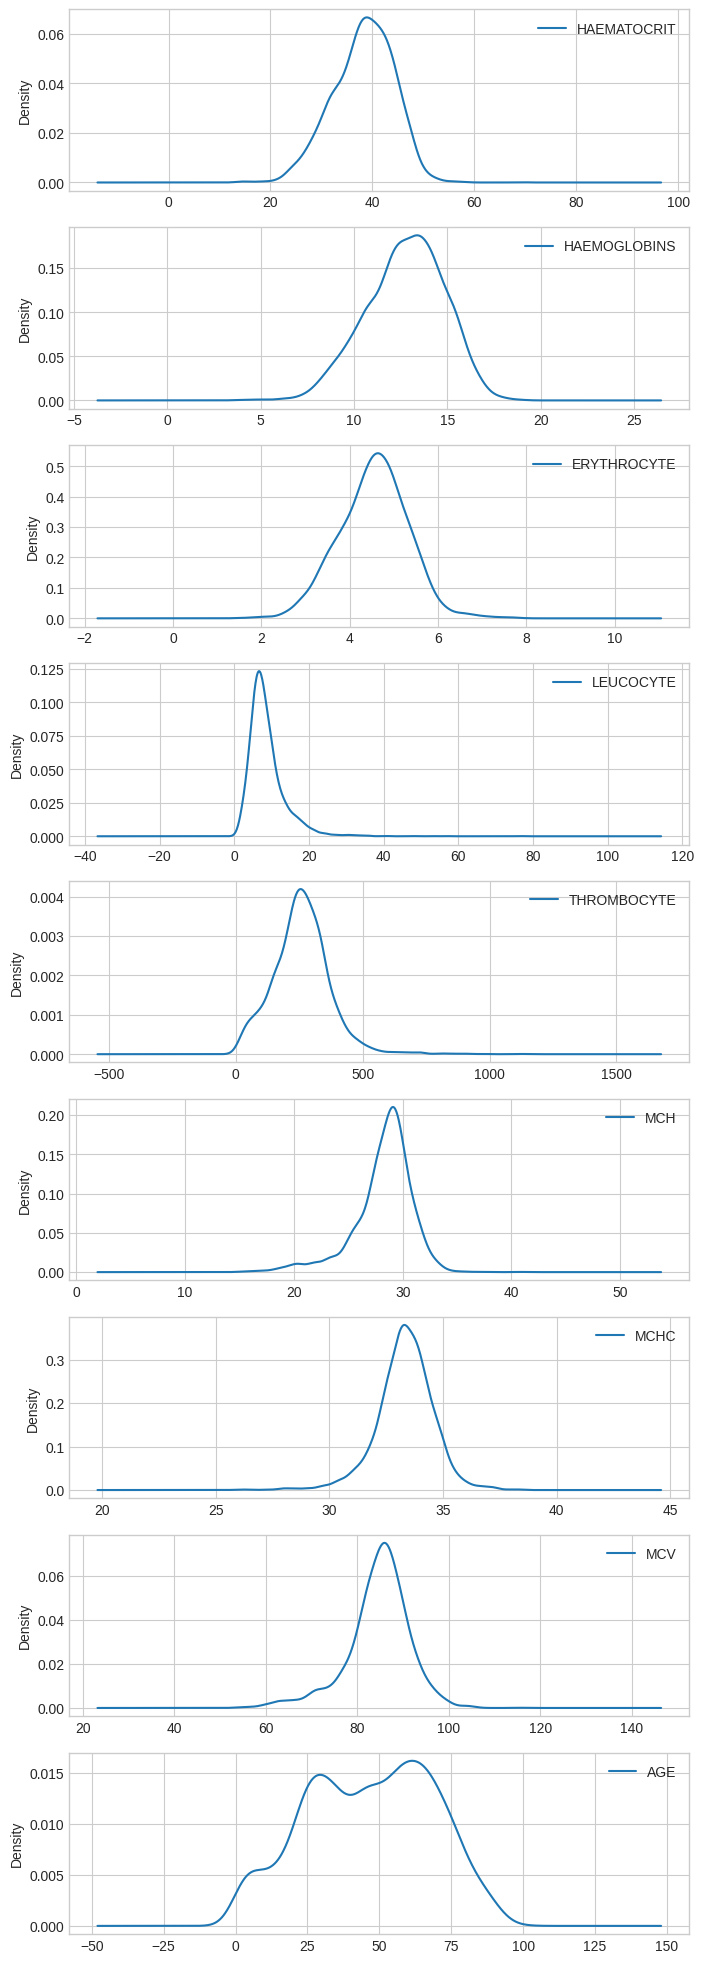

In [11]:

fig, axes = plt.subplots(9, 1, figsize=(8, 25))
for i, c in enumerate(num_features):
    f = data[[c]].plot(kind='kde',ax=axes[i])

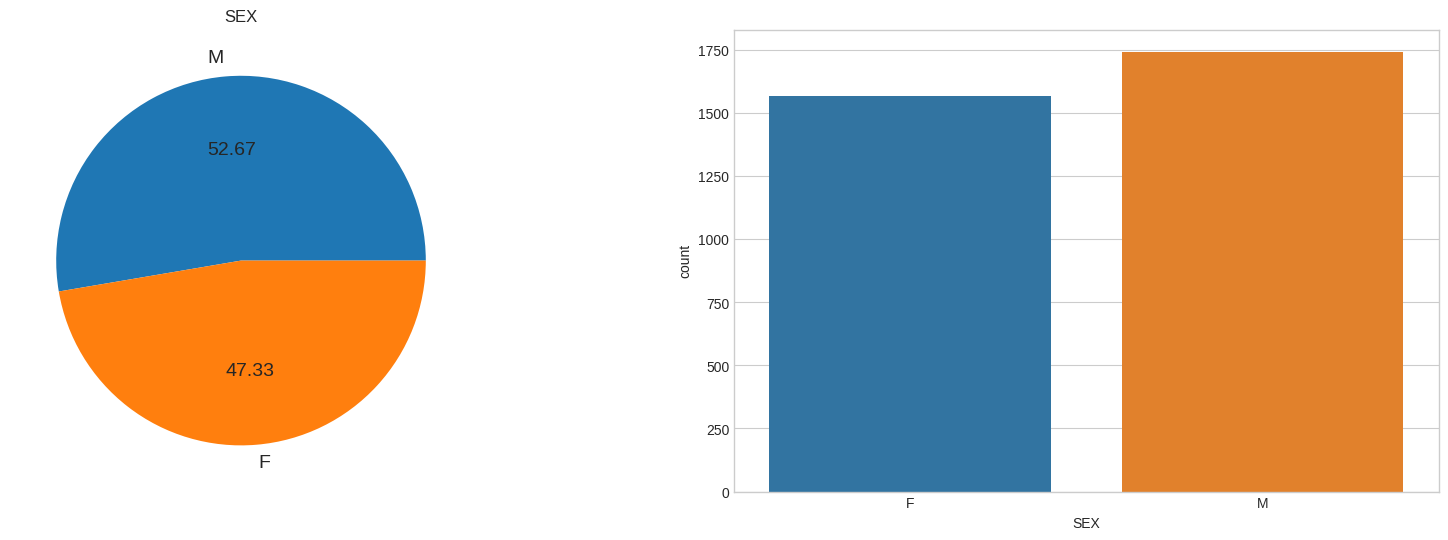

In [12]:
# Bar and count plot for Categorical feature
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
df = data['SEX'].value_counts()
barplot = df.plot(kind='pie', ax=axes[0], title='SEX', autopct="%.2f", fontsize=14, ylabel='')
countplot = sns.countplot(x='SEX', data=data, ax=axes[1])

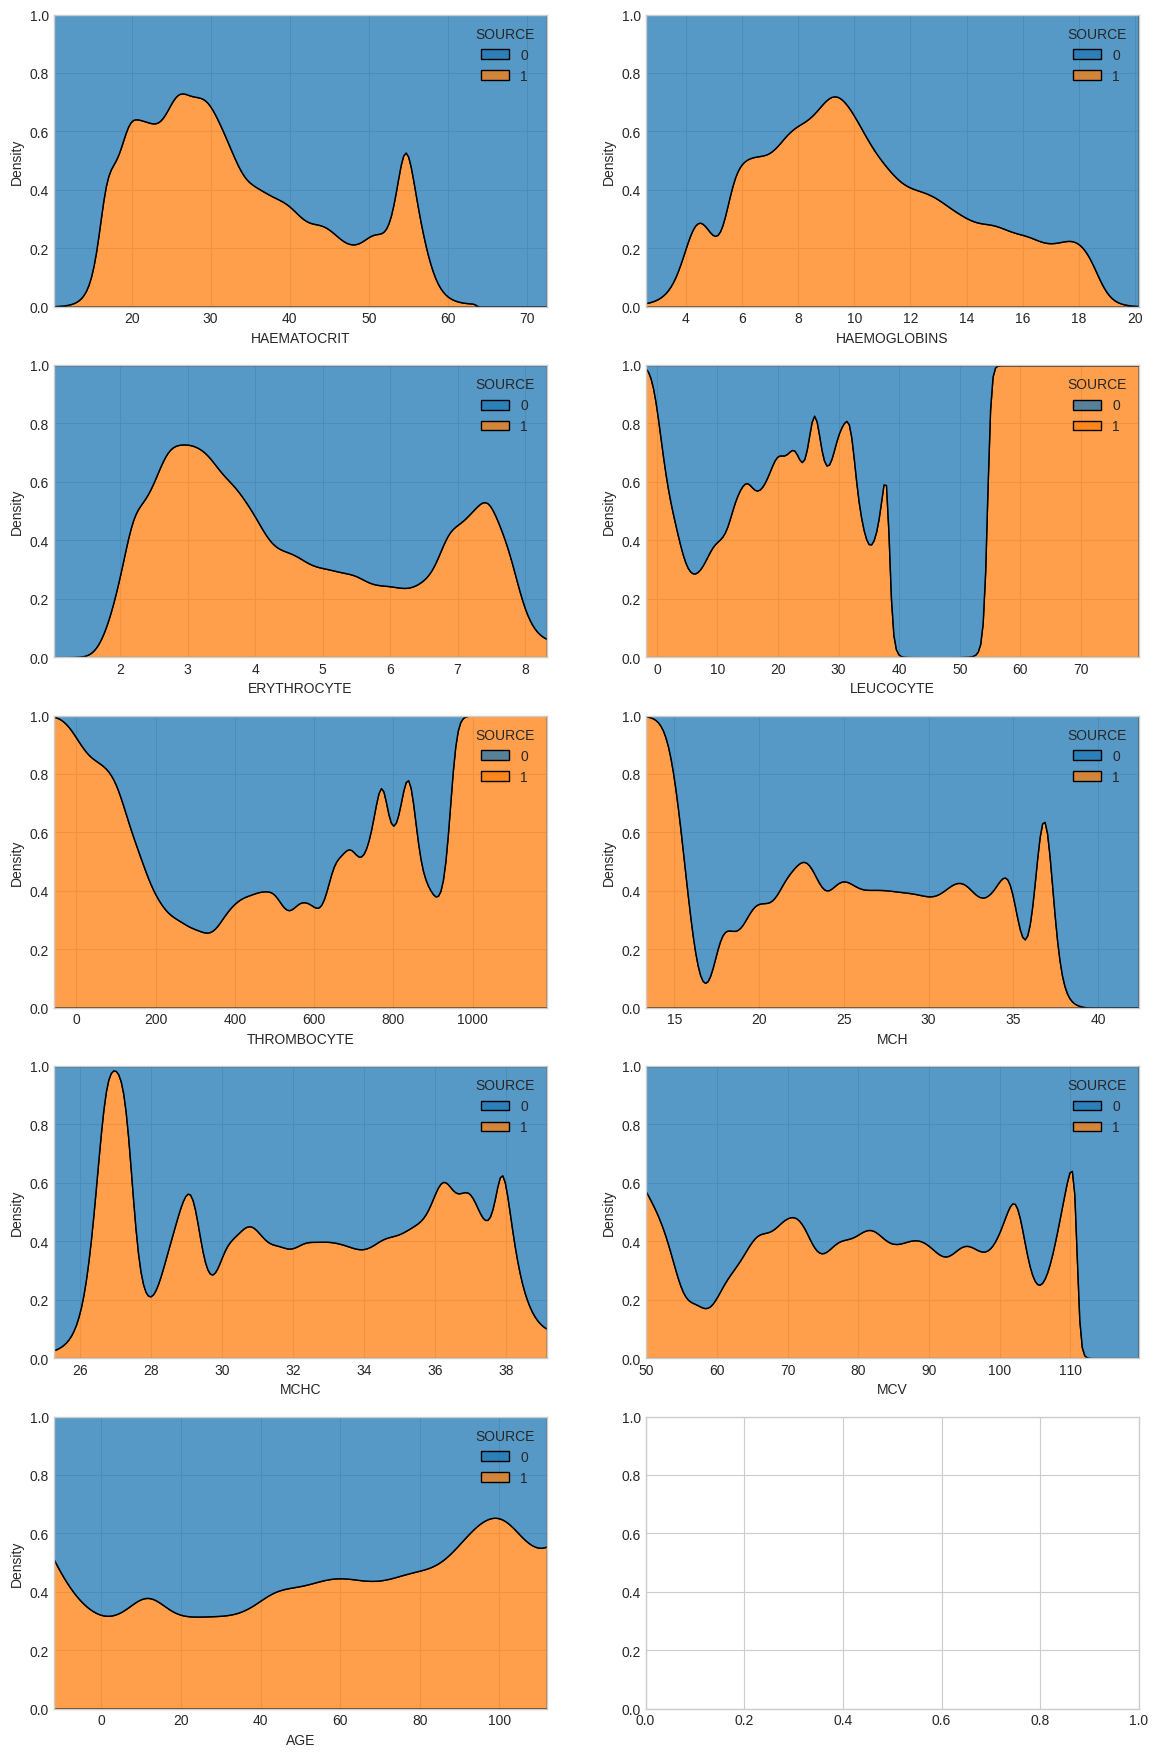

In [13]:

fig, axes = plt.subplots(5,2, figsize=(14,22))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(data[num_features]):
    plot = sns.kdeplot(data=data, x=c, hue='SOURCE', multiple='fill', ax=axes[i])


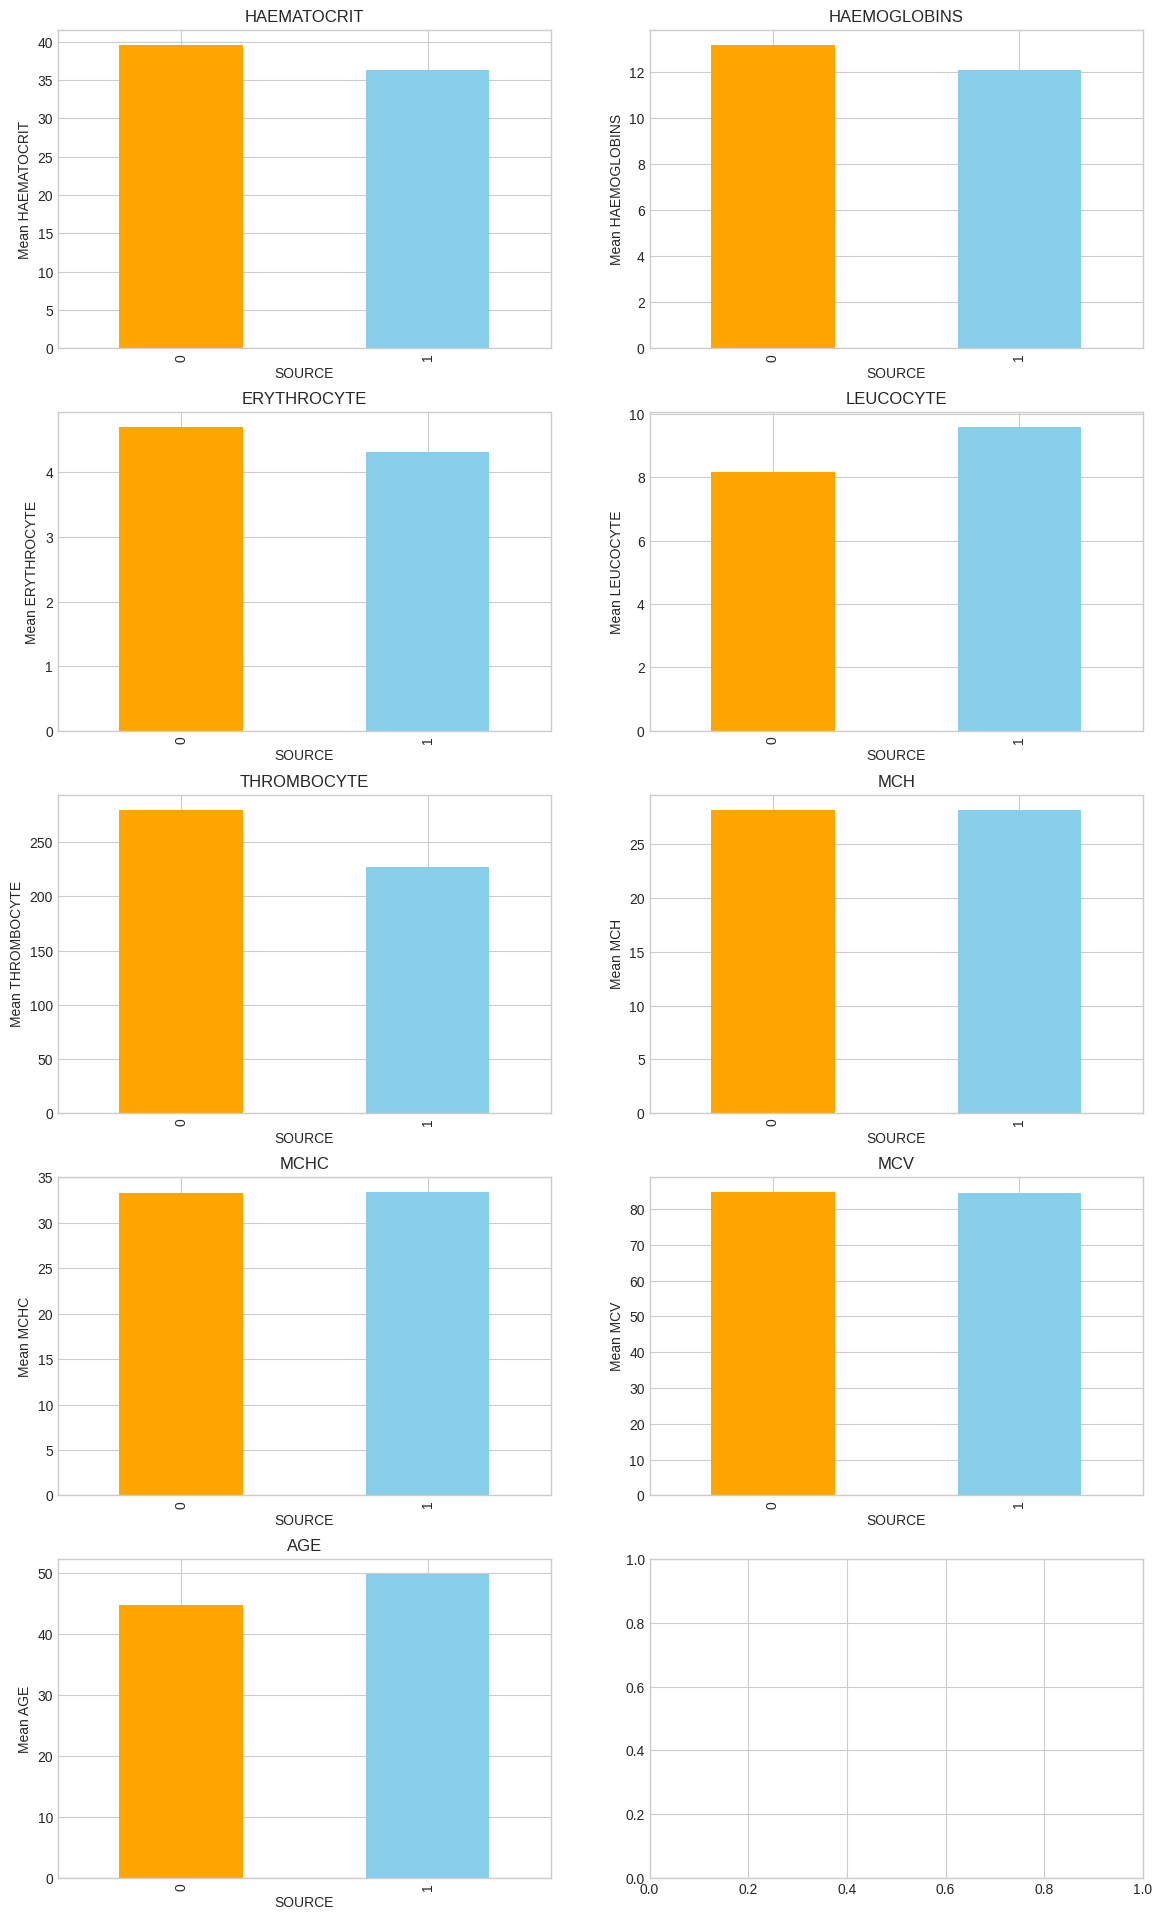

In [14]:

fig, axes = plt.subplots(5,2, figsize=(14,24))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(data[num_features]):
    df = data.groupby("SOURCE")[c].mean()
    plot = df.plot(kind='bar', title=c, ax=axes[i], ylabel=f'Mean {c}', color=('orange','skyblue'))

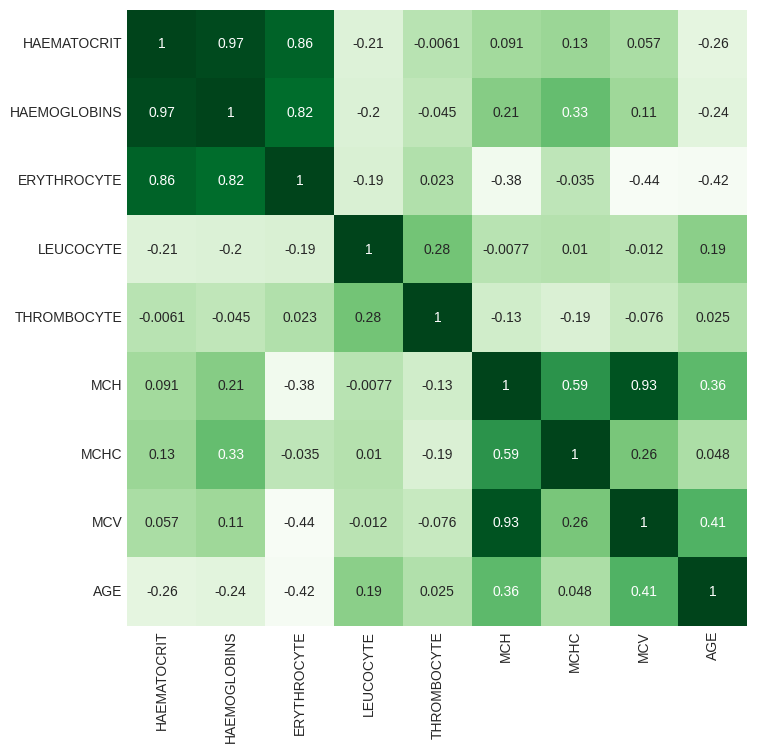

In [15]:

corr_matt = data[num_features].corr(method='pearson')
plt.figure(figsize=(8,8))
corr = sns.heatmap(corr_matt, annot=True, cmap='Greens', cbar=False)

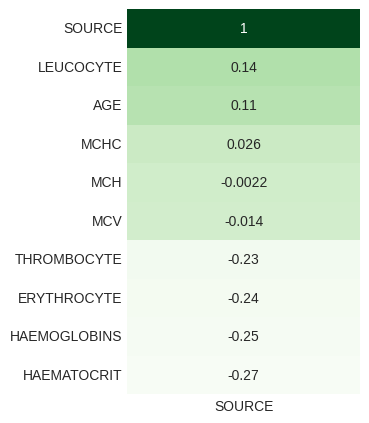

In [16]:
corr_matt = data.corr(method='pearson')[['SOURCE']].sort_values(by='SOURCE',ascending=False)
plt.figure(figsize=(3,5))
corr = sns.heatmap(corr_matt, annot=True, cmap='Greens', cbar=False)

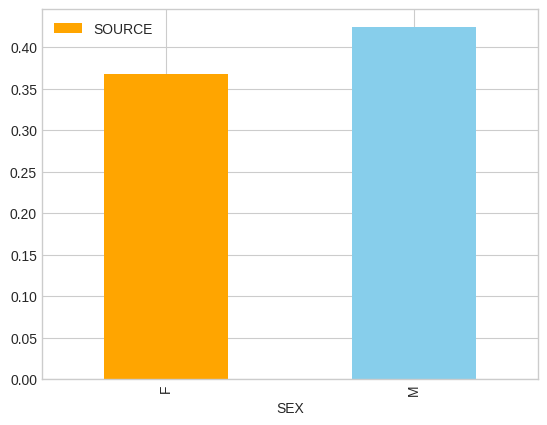

In [17]:

df = data.groupby('SEX')['SOURCE'].mean().to_frame().reset_index()
plot = df.plot(kind='bar', x='SEX', y='SOURCE', color=('orange', 'skyblue'))

In [18]:

X_train.SEX.replace({'F':0, 'M':1}, inplace=True)
X_test.SEX.replace({'F':0, 'M':1}, inplace=True)

In [19]:

scaler = MinMaxScaler(feature_range=(0, 1))

X_train[num_features] = scaler.fit_transform(X_train[num_features]) #fit and transform the train set
X_test[num_features] = scaler.transform(X_test[num_features]) #transform the test test
# preprocessed data

X_train.head(3)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
2418,0.399638,0.529801,0.443902,0.172662,0.216022,0.505792,0.564516,0.503247,0.653061,0
2523,0.464738,0.615894,0.500813,0.136691,0.320432,0.532819,0.580645,0.525974,0.581633,0
1561,0.517179,0.662252,0.653659,0.201439,0.297930,0.393822,0.532258,0.371753,0.244898,0


In [20]:

X_train.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)
X_test.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)

# final train set
X_train.head(3)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,AGE,SEX
2418,0.399638,0.529801,0.443902,0.172662,0.216022,0.653061,0
2523,0.464738,0.615894,0.500813,0.136691,0.320432,0.581633,0
1561,0.517179,0.662252,0.653659,0.201439,0.297930,0.244898,0


In [21]:
# DT
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

print("Train accuracy : ", accuracy_score(y_train, tree.predict(X_train)))
print("Test accuracy : ", accuracy_score(y_test, tree.predict(X_test)))

Train accuracy :  1.0
Test accuracy :  0.6646525679758308


In [26]:
# LR
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

print("Train accuracy : ", accuracy_score(y_train, logreg.predict(X_train)))
print("Test accuracy : ", accuracy_score(y_test, logreg.predict(X_test)))

Train accuracy :  0.7060823573857197
Test accuracy :  0.716012084592145


In [30]:
# SVM
svc = SVC(random_state=1)

svc.fit(X_train, y_train)

print("Train accuracy : ", accuracy_score(y_train, svc.predict(X_train)))
print("Test accuracy : ", accuracy_score(y_test, svc.predict(X_test)))

Train accuracy :  0.7563279183981866
Test accuracy :  0.7477341389728097


In [31]:
# RF
forest = RandomForestClassifier(random_state=1)

forest.fit(X_train, y_train)

print("Train accuracy : ", accuracy_score(y_train, forest.predict(X_train)))
print("Test accuracy : ", accuracy_score(y_test, forest.predict(X_test)))

Train accuracy :  1.0
Test accuracy :  0.7522658610271903


In [34]:
data['AGE']=data['AGE'].apply(lambda x:float(x))
data['AGE'].max()
     

99.0

<Axes: xlabel='AGE'>

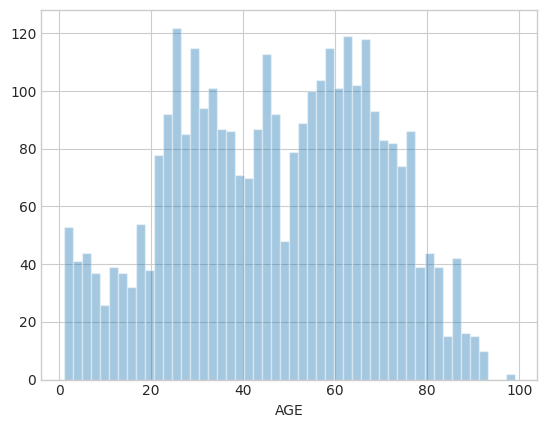

In [35]:

data_p=data
data_p.dropna(inplace=True)
sns.set_style('whitegrid')
sns.distplot(data_p['AGE'],bins=50,kde=False)

In [36]:
df1=data.copy()

<Axes: xlabel='SOURCE', ylabel='count'>

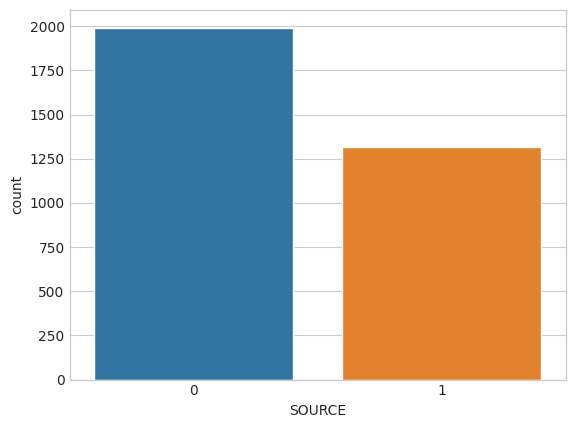

In [38]:
sns.countplot(x='SOURCE',data=df1)

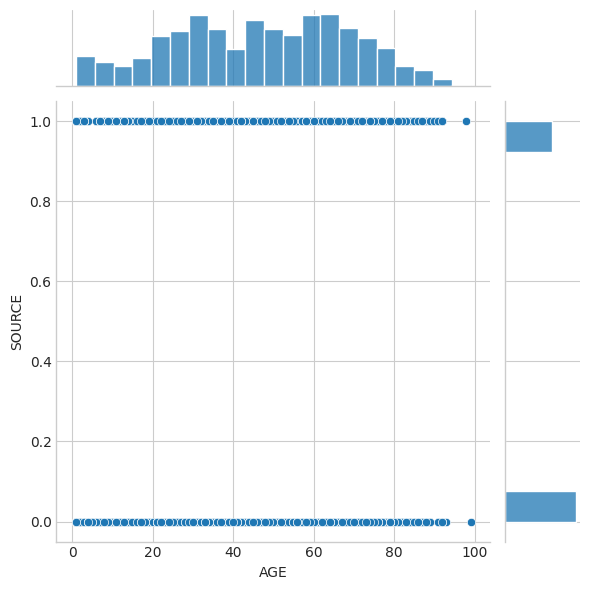

In [41]:
sns.jointplot(x="AGE",y="SOURCE",data=df1)

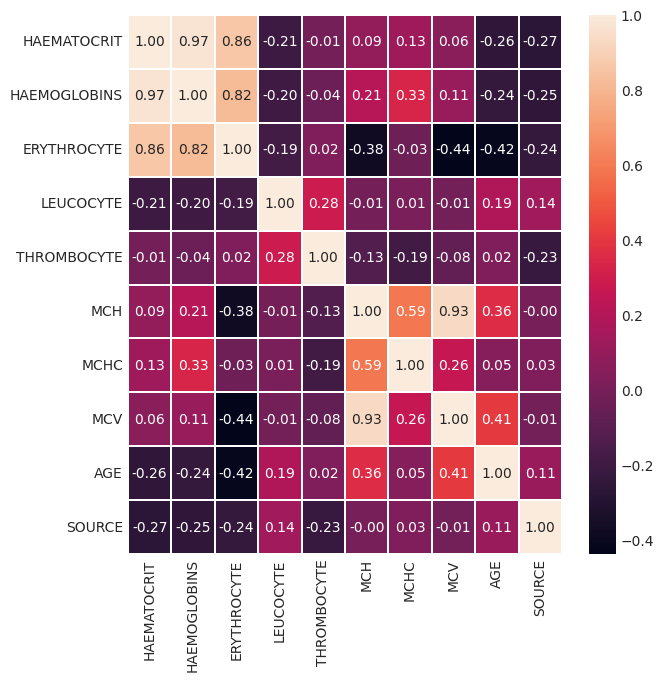

In [42]:
f,ax = plt.subplots(figsize = (7, 7))
sns.heatmap(data.corr(), annot = True, linewidths = .1, fmt = '.2f')
plt.show()

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

In [45]:
# Naive Bayes

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train,y_train)
naive_bayes_pred = naive_bayes_model.predict(X_test)

#Summary of the predictions made by the classifier

print(classification_report(y_test, naive_bayes_pred))

#print(confusion_matrix(y_test, naive_bayes_pred))
print("ACC: ",accuracy_score(naive_bayes_pred,y_test))

naive_bayes_score = accuracy_score(naive_bayes_pred,y_test)*100
print('Overall Accuracy of Naive Bayes:',naive_bayes_score)

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       399
           1       0.67      0.54      0.60       263

    accuracy                           0.71       662
   macro avg       0.70      0.68      0.69       662
weighted avg       0.71      0.71      0.70       662

ACC:  0.7114803625377644
Overall Accuracy of Naive Bayes: 71.14803625377644


In [47]:
# MLP
clf = MLPClassifier(hidden_layer_sizes=(150,100,50),max_iter=300,activation = 'relu',solver='adam',random_state=1)
clf.fit(X_train, y_train)
    
mpl_pred = clf.predict(X_test)

#Summary of the predictions made by the classifier

print(classification_report(y_test, mpl_pred))

#print(confusion_matrix(y_test, mpl_pred))
print("ACC: ",accuracy_score(mpl_pred,y_test))

mpl_pred_score = accuracy_score(mpl_pred,y_test)*100
print('Overall Accuracy of MLP:',mpl_pred_score)

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       399
           1       0.73      0.62      0.67       263

    accuracy                           0.76       662
   macro avg       0.75      0.74      0.74       662
weighted avg       0.76      0.76      0.75       662

ACC:  0.7583081570996979
Overall Accuracy of MLP: 75.83081570996978


In [49]:
# KNN 
k_range = range(1,26)
scores = []
for k in k_range :
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train,y_train)
    pred = KNN.predict(X_test)
    scores.append(accuracy_score(pred,y_test)*100)
    
print(pd.DataFrame(scores))

            0
0   69.033233
1   70.694864
2   70.996979
3   71.450151
4   73.111782
5   73.867069
6   75.377644
7   75.075529
8   75.528701
9   75.528701
10  75.226586
11  76.435045
12  75.528701
13  75.679758
14  75.528701
15  75.226586
16  75.528701
17  75.226586
18  75.377644
19  75.377644
20  75.377644
21  74.622356
22  74.320242
23  74.471299
24  74.924471


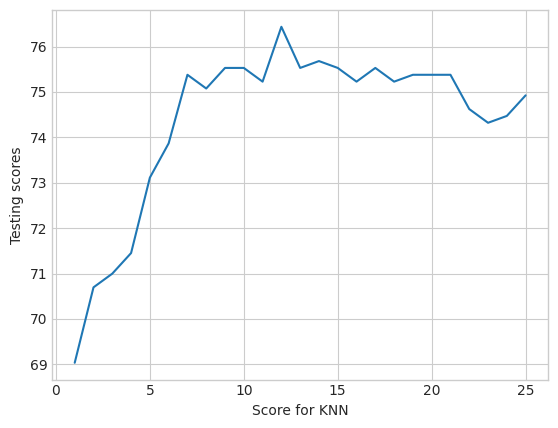

In [50]:
plt.plot(k_range,scores)
plt.xlabel("Score for KNN")
plt.ylabel("Testing scores")
plt.show()

In [53]:
#Perceptron

clf = Perceptron()
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

#Summary of the predictions made by the classifier

print(classification_report(y_test, clf_pred))

#print(confusion_matrix(y_test, clf_pred))
print("ACC: ",accuracy_score(clf_pred,y_test))

clf_score = accuracy_score(clf_pred,y_test)*100
print('Overall Accuracy of Perceptron:',clf_score)

              precision    recall  f1-score   support

           0       0.81      0.06      0.12       399
           1       0.41      0.98      0.57       263

    accuracy                           0.43       662
   macro avg       0.61      0.52      0.35       662
weighted avg       0.65      0.43      0.30       662

ACC:  0.4259818731117825
Overall Accuracy of Perceptron: 42.59818731117825


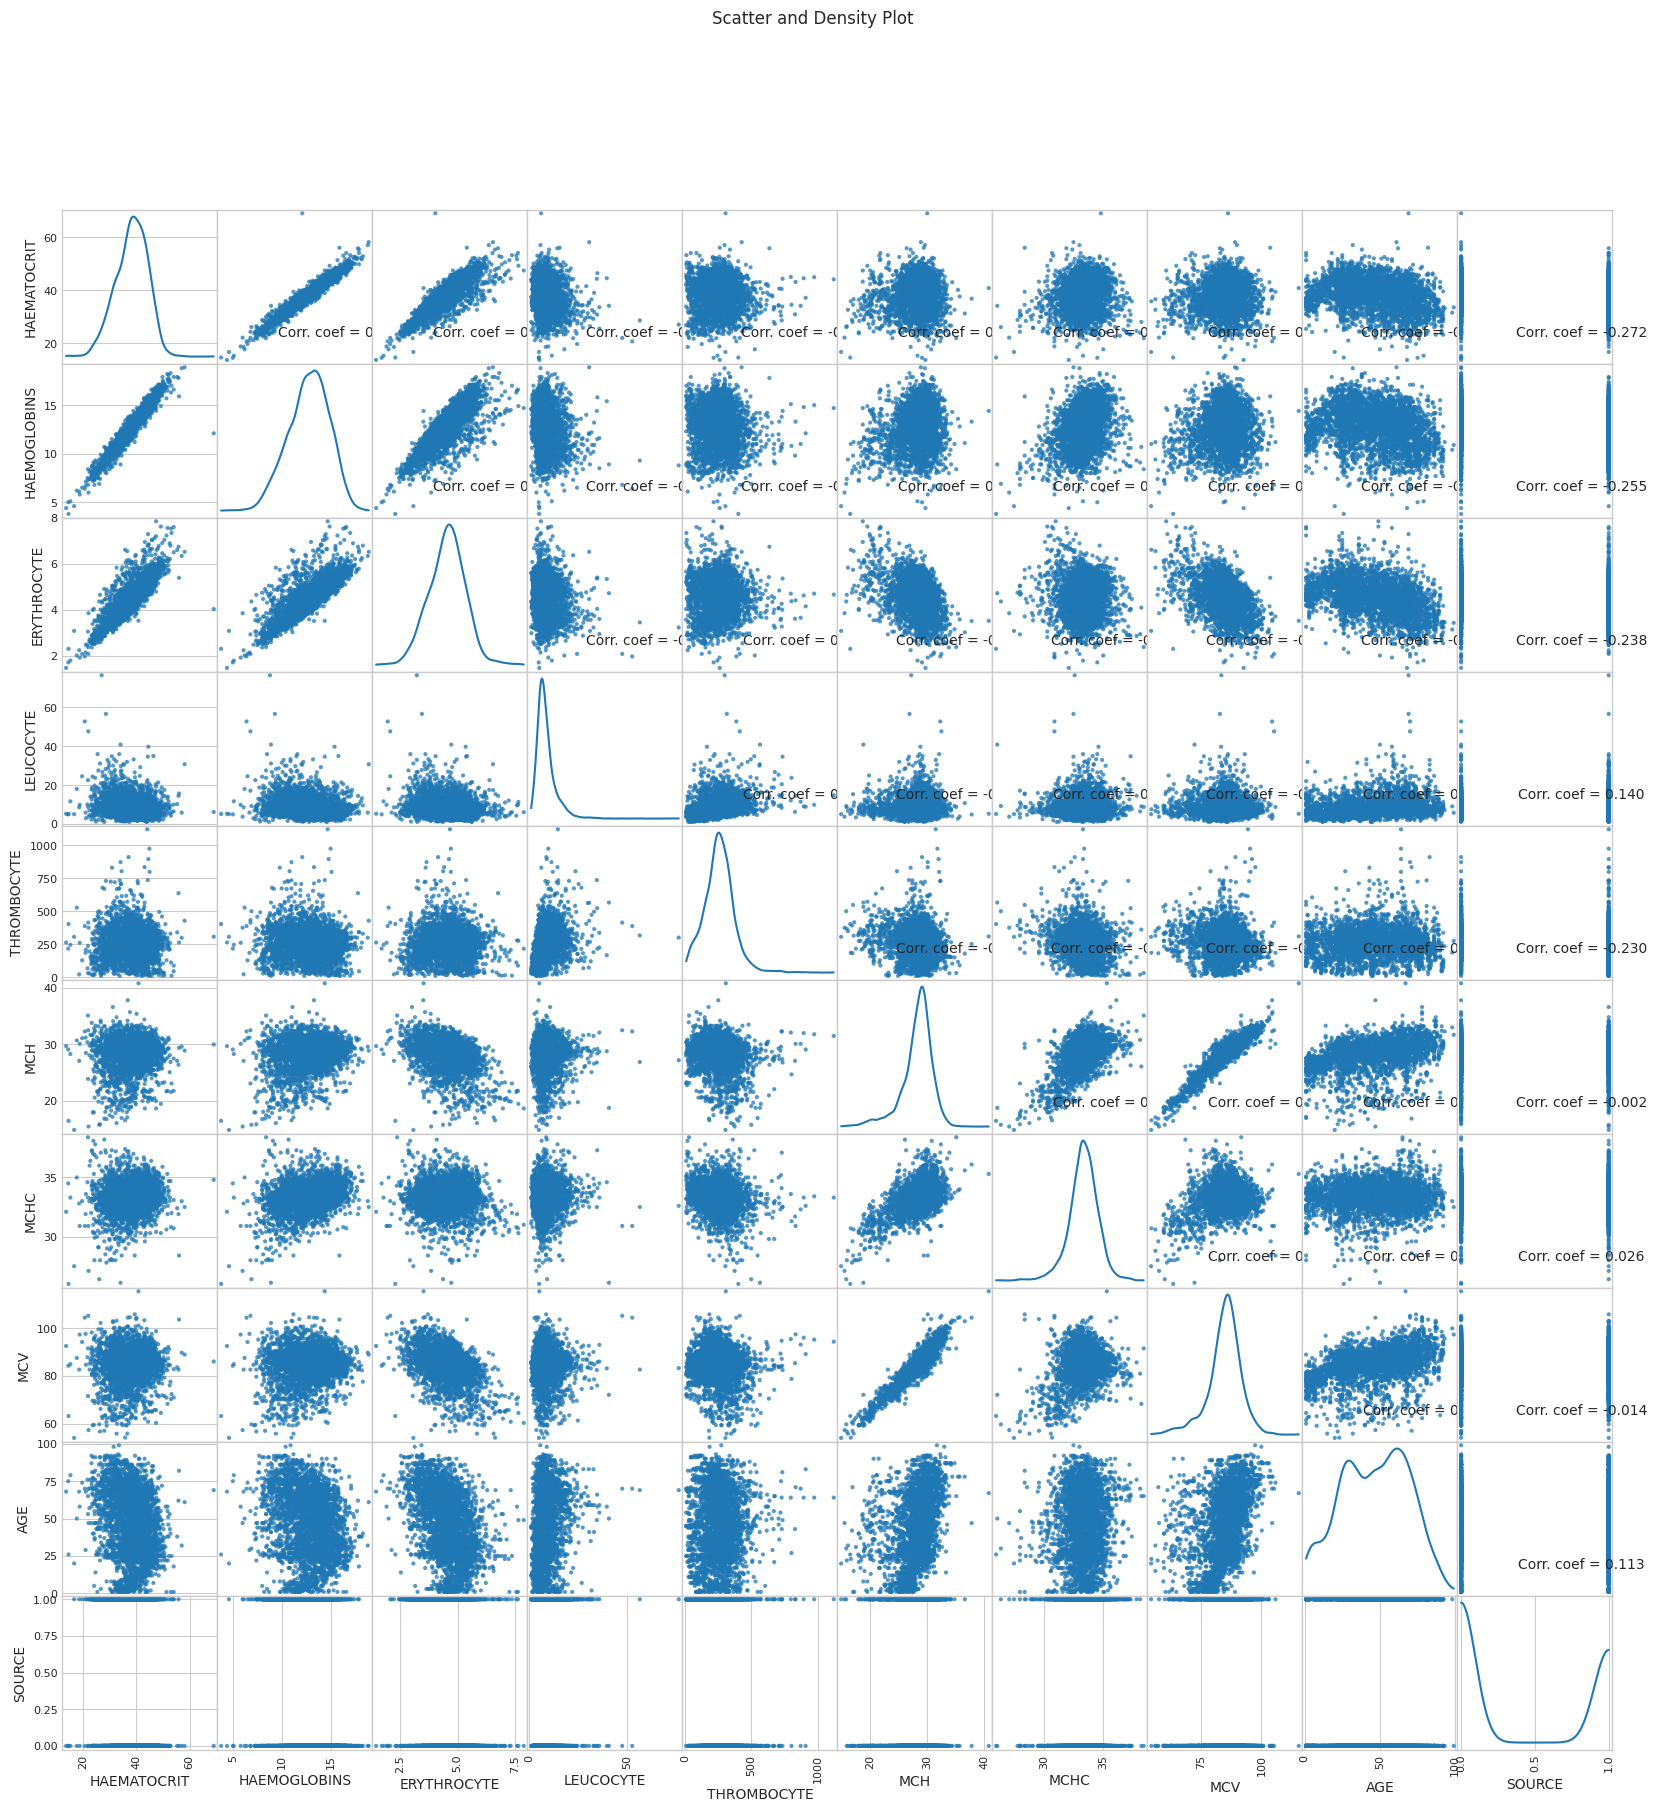

In [54]:
from pandas.plotting import scatter_matrix
     

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
plotScatterMatrix(df1, 20, 10)

In [56]:
from sklearn.metrics import confusion_matrix

Confusion Matrix
[[358  41]
 [149 114]]


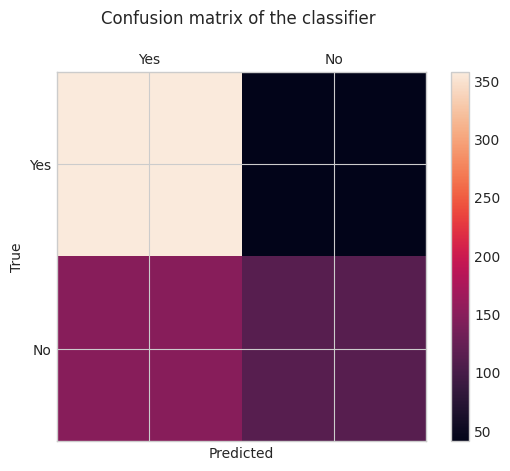

In [57]:
classifier=LogisticRegression(random_state=0,solver='liblinear',multi_class='auto')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
labels=['Yes','No']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()